# Data import and visualization

In [54]:
# imports & formatting
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

import numpy as np
import pandas as pd
import seaborn as sns
from   sklearn.linear_model import LinearRegression
from   sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from   sklearn.model_selection import cross_val_score
from scipy import optimize

%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.style.use('seaborn-poster')

full_DS = pd.read_csv("sharpeDS.csv")
full_DS

,date,open,high,low,close,adjclose,volume,ticker,monthly_return,name,sector,month
0,2010-01-01,26.000362,27.247843,25.376621,25.400612,19.294617,259719884,ABT,NaN,Abbott Laboratories,Health Care,1
1,2010-02-01,25.482178,26.389000,25.271067,26.043545,19.927471,303364943,ABT,3.279954,Abbott Laboratories,Health Care,2
2,2010-03-01,26.086725,26.652889,25.050358,25.275864,19.340067,402914340,ABT,-2.947711,Abbott Laboratories,Health Care,3
3,2010-04-01,25.333441,25.549351,23.706919,24.546568,18.782045,361812837,ABT,-2.885313,Abbott Laboratories,Health Care,4
4,2010-05-01,24.685711,24.752882,21.715748,22.819288,17.607489,436325761,ABT,-6.253615,Abbott Laboratories,Health Care,5
...,...,...,...,...,...,...,...,...,...,...,...,...
58241,2019-12-01,314.589996,323.799988,307.130005,321.859985,311.367798,1285175800,SPY,2.402082,S&P 500,All,12
58242,2019-12-01,314.589996,323.799988,307.130005,321.859985,311.367798,1285175800,SPY,2.402082,S&P 500,All,12
58243,2020-01-01,323.540009,332.950012,320.359985,321.730011,312.772308,1392003800,SPY,0.451078,S&P 500,All,1
58244,2020-01-01,323.540009,332.950012,320.359985,321.730011,312.772308,1392003800,SPY,0.451078,S&P 500,All,1


In [55]:
round(full_DS.describe(),3)

,open,high,low,close,adjclose,volume,monthly_return,month
count,58246.000,58246.000,58246.000,58246.000,58246.000,5.824600e+04,57743.000,58246.000
mean,80.668,85.371,76.578,81.427,74.622,1.300829e+08,1.506,6.465
std,132.960,141.309,126.632,134.734,134.364,4.540038e+08,7.733,3.474
min,0.760,0.920,0.650,0.760,0.760,0.000000e+00,-67.405,1.000
25%,32.140,34.170,30.390,32.410,27.120,2.379628e+07,-2.750,3.000
50%,53.440,56.450,50.640,53.820,46.878,4.823550e+07,1.527,6.000
75%,88.497,93.260,84.370,89.328,80.770,1.053325e+08,5.606,9.000
max,3777.000,4058.000,3696.540,3816.970,3816.970,1.808265e+10,190.419,12.000


In [56]:
# correlation matrix of top 10 companies
# full_DS.groupby('name')
# corr_df = full_DS.corr(method='pearson')
# sns.heatmap(corr_df, annot=True)
df_corr_subset = full_DS.loc[full_DS['name'].isin(top10.index.values)].reset_index()
df_corr_subset = df_corr_subset[['date','ticker','adjclose']]
df_corr_subset.head()
df_pivot = df_corr_subset.pivot('date','ticker','adjclose').dropna().reset_index()
df_pivot.head()


ticker,date,ABMD,ALGN,AMD,AVGO,CDAY,CZR,DPZ,DXCM,ENPH,...,MTCH,NFLX,NOW,NVDA,NXPI,PAYC,REGN,TDG,TSLA,URI
0,2019-01-01,351.070007,248.949997,24.410000,241.458099,41.209999,46.619999,276.797729,141.029999,7.23,...,53.490002,339.500000,220.020004,35.711910,84.172806,148.240005,429.269989,349.164764,61.403999,125.260002
1,2019-02-01,334.500000,258.970001,23.530001,247.857956,49.020000,48.209999,244.808884,139.330002,9.07,...,55.380001,358.100006,239.440002,38.322906,88.321960,181.729996,430.739990,387.644318,63.976002,134.589996
2,2019-03-01,285.589996,284.329987,25.520000,270.676086,51.299999,46.689999,251.793915,119.099998,9.23,...,56.610001,356.559998,246.490005,44.654186,85.488159,189.130005,410.619995,405.415070,55.972000,114.250000
3,2019-04-01,277.410004,324.679993,27.629999,289.159393,53.150002,49.369999,264.670105,121.070000,10.04,...,60.400002,370.540009,271.510010,45.012299,102.428299,202.529999,343.140015,430.892487,47.737999,140.919998
4,2019-05-01,261.920013,284.350006,27.410000,228.530396,49.180000,49.169998,273.395325,121.300003,15.17,...,68.650002,343.279999,261.929993,33.687099,85.495918,212.100006,301.720001,393.770325,37.032001,110.099998


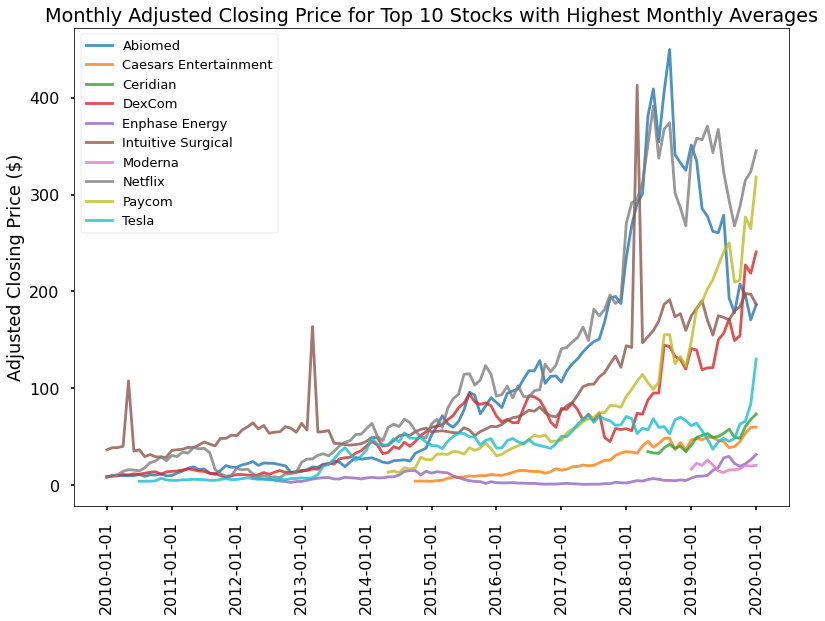

In [48]:
#just copied code

# imports & formatting
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

import numpy as np
import pandas as pd
import seaborn as sns
from   sklearn.linear_model import LinearRegression
from   sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from   sklearn.model_selection import cross_val_score

%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.style.use('seaborn-poster')

finalOutput = pd.read_csv('sharpeDS.csv')
round(finalOutput.describe(),3)

colorList=["black","fuchsia","maroon","darkorange","lawngreen","darkslategray","deepskyblue","blueviolet","lightpink","gold","darkkhaki","darkgoldenrod"]
i=0

x=10
topx = avg_monthly_returns.nlargest(n=x)
top10_names = topx.index
names = set()
for i in top10_names:
  names.add(i)
names







colorList=["black","fuchsia","maroon","darkorange","lawngreen","darkslategray","deepskyblue","blueviolet","lightpink","gold","darkkhaki","darkgoldenrod"]
i=0

p = finalOutput[finalOutput['name'].isin(names)].sort_values(by='date').groupby(['name','date']).mean().reset_index()
for sec in p.name.unique():
    plt.plot(p[p['name'] == sec].date, p[p['name'] == sec].adjclose, label = sec, alpha=.8)
    i+=1
    
plt.legend(prop={'size': 13})
plt.xticks(np.arange(0, 132, 12),rotation=90)
plt.title('Monthly Adjusted Closing Price for Top 10 Stocks with Highest Monthly Averages')
plt.ylabel('Adjusted Closing Price ($)');

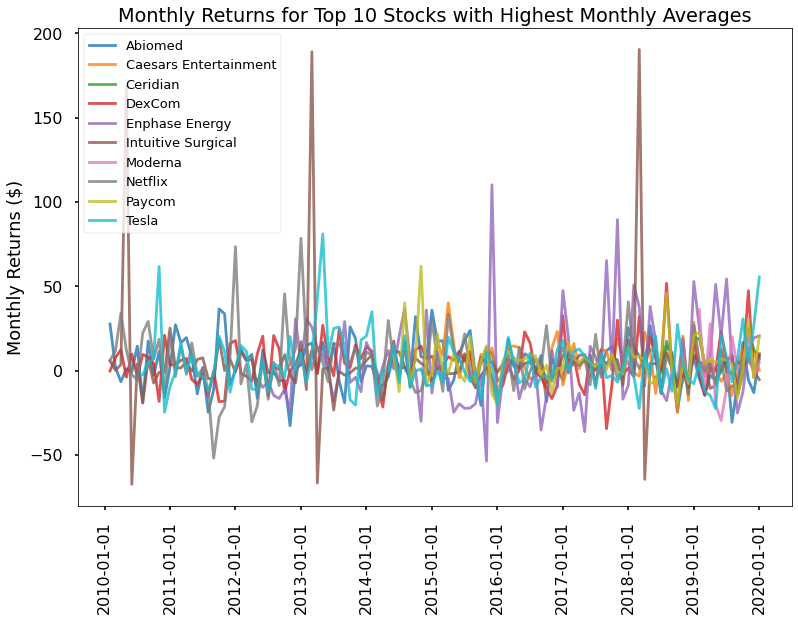

In [49]:

# Monthly returns
p = finalOutput[finalOutput['name'].isin(names)].sort_values(by='date').groupby(['name','date']).mean().reset_index()
for sec in p.name.unique():
    plt.plot(p[p['name'] == sec].date, p[p['name'] == sec].monthly_return, label = sec, alpha=.8)
    i+=1
    
plt.legend(prop={'size': 13})
plt.xticks(np.arange(0, 132, 12),rotation=90)
plt.title('Monthly Returns for Top 10 Stocks with Highest Monthly Averages')
plt.ylabel('Monthly Returns ($)');

# Modeling

In [50]:
# Write Sharpe ratio function - Ben
# Sharpe ratio should be negativized - all optimization functions are written to minimize,
# so if we want to MAXIMIZE sharpe, then we need to minimize negative sharpe
def negative_sharpe_ratio(periodic_weights, periodic_returns, periodic_riskfree):
  """ 
    periodic_returns - dataframe containing the daily / monthly periodic returns (end of period - start of period) / start of period prices for multiple periods
    periodic_weights - weight vector for multiple periods each weight vector should sum to 1
    periodic_riskfree - risk free ratio
  """
  #print(periodic_returns)
  #print(type(periodic_returns))
  mark_returns = [np.dot(periodic_weights[i], periodic_returns.iloc[i]) for i in range(periodic_returns.size)]
  risk_rate = periodic_riskfree / 100

  er, sd = np.average(mark_returns), np.std(mark_returns)

  monthly_sharpe_ratio = (er - np.average(risk_rate)) / sd
  #print(er, sd, np.average(risk_rate))
  #print(monthly_sharpe_ratio)

  annualized_sharpe_ratio = (8.279)**(1/2) * monthly_sharpe_ratio
  return -1 * monthly_sharpe_ratio #, annualized_sharpe_ratio)



In [51]:
# testing sharpe
weight = pd.Series([1,1,1,1,1])
returns = pd.Series([1,2,3,4,5])
risk_free = pd.Series([0,0,0,0,0])
negative_sharpe_ratio(weight, returns, risk_free)

-2.1213203435596424

# Model Creation

In [52]:
# Honestly not sure, but constrains the minimization function to only allow
# the weight vector to add up to one
def constraint(x):
    A= np.ones(x.shape)
    b=1
    constraintVal = np.matmul(A,x.T)-b 
    return constraintVal

class MarkowitzModel():
    # currently initiates weight vectors so that all assets are weighted equally
    def __init__(self, num_assets, risk_free):
        self.winit = np.repeat(1.0/num_assets, num_assets)
        self.risk_free = risk_free
        
    # all values in weight vector must be between 0 and 1
    def bounds(self):
        return tuple([(0,1) for x in self.winit])

    def maximize(self, periodic_returns): 
        cons = ({'type': 'eq', 'fun':constraint})
        opt = optimize.minimize(negative_sharpe_ratio, x0 = self.winit, args = \
                                (periodic_returns, self.risk_free), method = 'SLSQP', 
                                 bounds = self.bounds(), constraints = cons, tol = 10**-3)
        return opt.x


# Data Preprocess

In [53]:
# Remove S&P Index from the dataset and fill in missing companies.
# Only the most recent several dates have all 500 companies, so we fill in all months
# with all the 500 current S&P companies

full_DS = full_DS[full_DS['name'] != "S&P 500"]    #removing S&P Index from ds

#master list of 500 companies (most recent month)
master_name_list = full_DS[full_DS.date == "2020-01-01"].name   
master_name_set = set(master_name_list)

# for each month in the dataset,
for group_name, df_month in full_DS.groupby(pd.Grouper(key='date')):
  # add any companies that are in the master list 500 but arent in the current group
  name_difference = master_name_set.difference(set(df_month.name))

  for xtra in name_difference:
    full_DS = full_DS.append({'name': xtra, 'date': group_name, 'monthly_return': -100}, ignore_index=True)

#organize DS by ascending date, and within each date by alphabetical company
full_DS = full_DS.sort_values(by = ['date', 'name'])
full_DS['monthly_return'] = full_DS['monthly_return'].fillna(0)
full_DS


KeyboardInterrupt: 

In [ ]:
NUM_ASSETS = 500
model = MarkowitzModel(NUM_ASSETS, np.zeros(NUM_ASSETS))
weights = []

index = 0
# for each month in our full DS
for group_name, df_month in full_DS.groupby(pd.Grouper(key='date')):
  # find optimal weight distribution of alphabetically ordered companies.
  res = model.maximize(df_month.monthly_return)
  weights.append(res)
  
  print(index)
  index+=1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119


In [ ]:
# Save weights
np.save('final_119weights.npy', weights, allow_pickle=True)
#b = np.load('a.npy', allow_pickle=True)

In [ ]:
dates = full_DS['date'].unique()
returns = [np.dot(weights[i], full_DS[full_DS.date == dates[i]]['monthly_return']) for i in range(len(weights))]
print(returns)

[2.90123546487532, 5.256963680575152, 2.870984074306707, 2.0653963652813916, 27.479537771115904, 5.628130167426031, 1.9219948130257327, 7.356778585385627, 3.554237468212104, 61.7673977878156, 5.369683997641217, 55.324756351264085, 2.792042550712389, 3.404978772534286, 2.9174354759202066, 1.5279537859620729, 1.2748886403138593, 1.3471152341635027, 2.246973614025637, 0.7499382014952414, 9.89191832377512, 2.2147139496472126, 2.3344783268507117, 4.210346219313178, 2.8163507187154715, 2.392790367183192, 2.1932182948164582, 56.02911026404107, 2.9489584795119943, 44.26425184768656, 4.517889483841882, 2.398429106463946, 47.39768445589993, 2.4245348269823204, 1.9257179366332429, 5.510092407347317, 2.078783017547755, 3.515225689065327, 2.2755825588413714, 3.282422659161452, 39.729225168706066, 4.413773580695889, 44.76719184334397, 3.5351905514096216, 3.6843071706491735, 2.0845750428434724, 2.175803981668512, 2.5680364147434975, 3.986345194857033, 1.6479956512888385, 1.7687134398152706, 1.8988199

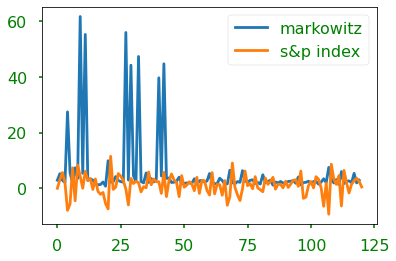

In [ ]:
# Most recent plot for 500 companies, 120 months
spindex = pd.read_csv("sharpeDS.csv")
spindex = spindex[spindex['name'] == 'S&P 500']
spindex = spindex.drop_duplicates(subset=['date'])
spindex['monthly_return'] = spindex['monthly_return'].fillna(0)
plt.plot(returns, label="markowitz")
plt.plot(spindex['monthly_return'].values, label="s&p index")
plt.legend()
plt.show()

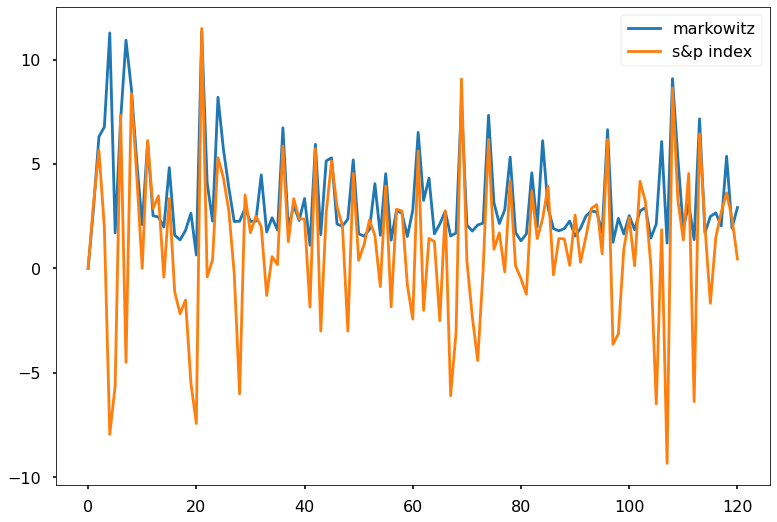

In [ ]:
# Old plot - don't get rid of this lol idk how to replicate it
spindex = pd.read_csv("sharpeDS.csv")
spindex = spindex[spindex['name'] == 'S&P 500']
spindex = spindex.drop_duplicates(subset=['date'])
spindex['monthly_return'] = spindex['monthly_return'].fillna(0)
plt.plot(returns, label="markowitz")
plt.plot(spindex['monthly_return'].values, label="s&p index")
plt.legend()
plt.show()


In [ ]:
# Finds average TRAINING sharpe ratio
iter = 0
sharpe_avg = 0
for group_name, df_month in full_DS.groupby(pd.Grouper(key='date')):
  #if index == 0:
    #print(df_month.monthly_return)

  sharpe = -1 * negative_sharpe_ratio(weights[iter], df_month.monthly_return,np.zeros(500) )
  sharpe_avg += sharpe
  print(iter, ": ", sharpe)
  iter+=1
  
print("avg sharpe: ", sharpe_avg / iter)

0 :  1.4212680828072641
1 :  1.946958243155288
2 :  1.296318506364567
3 :  0.30534263230838354
4 :  0.0447661481035792
5 :  1.7879849803059993
6 :  0.5078218334865672
7 :  2.2831654002910637
8 :  1.3925756309643722
9 :  0.044766148103552374
10 :  1.8130244095231511
11 :  0.04476614810358765
12 :  1.4409290787398945
13 :  0.9513716767436019
14 :  1.5236692001315804
15 :  0.8434388649121555
16 :  0.6312464161277918
17 :  0.5410684646762915
18 :  0.5176654759322987
19 :  0.356741151883189
20 :  2.1769803623580573
21 :  0.9186151125264472
22 :  1.1086867163094638
23 :  1.5787921464570853
24 :  1.4458604060832283
25 :  1.6114923127221472
26 :  0.9384577734057015
27 :  0.04476614810328593
28 :  1.4575438790962847
29 :  0.04592208858332497
30 :  1.1019972728060776
31 :  1.2859872576048548
32 :  0.06123691464327512
33 :  1.1601139135345486
34 :  1.297724734568707
35 :  2.212562925672514
36 :  1.1730902836408654
37 :  1.8015736690907942
38 :  1.1698422498194576
39 :  1.1537885553708769
40 :  0.

# Back Testing
We back test by, for example, calculating the optimal weights for the month of January, and then applying those weights in February.

115.35774334116572
138.30068839944755


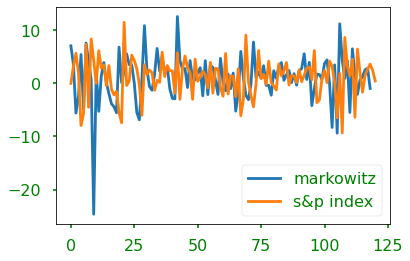

In [ ]:

dates = full_DS['date'].unique()
offset_returns = [np.dot(weights[i], full_DS[full_DS.date == dates[i+1]]['monthly_return']) for i in range(len(dates) - 1)]

print(np.sum(offset_returns))


spindex = pd.read_csv("sharpeDS.csv")
spindex = spindex[spindex['name'] == 'S&P 500']
spindex = spindex.drop_duplicates(subset=['date'])
spindex['monthly_return'] = spindex['monthly_return'].fillna(0)
print(np.sum(spindex['monthly_return']))

plt.plot(offset_returns, label="markowitz")
plt.plot(spindex['monthly_return'].values, label="s&p index")
plt.legend()
plt.show()

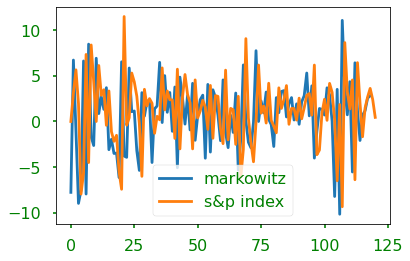

In [ ]:
saved_weights = np.load('weights_113.npy', allow_pickle=True)
dates = full_DS['date'].unique()
offset_returns = [np.dot(saved_weights[i], full_DS[full_DS.date == dates[i]]['monthly_return']) for i in range(len(dates) - 1)]


spindex = pd.read_csv("sharpeDS.csv")
spindex = spindex[spindex['name'] == 'S&P 500']
spindex = spindex.drop_duplicates(subset=['date'])
spindex['monthly_return'] = spindex['monthly_return'].fillna(0)

plt.plot(offset_returns, label="markowitz")
plt.plot(spindex['monthly_return'].values, label="s&p index")
plt.legend()
plt.show()